<a href="https://colab.research.google.com/github/MamatJasseh/PROJECTS/blob/main/Mamat_Jasseh_BAN230_Final_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the following file:


In [51]:
import pandas as pd

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [6]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [7]:
df.shape

(4898, 12)

1. Check the datatypes of the attributes. (3 points)

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

2. What is the correlation between the attributes other than Quality? (4 points)

In [10]:
correlation_matrix = df.corr()
correlation_matrix = correlation_matrix.drop('quality', axis=0).drop('quality', axis=1)
correlation_matrix


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433


3. Graph the frequency distribution of wine quality by using Quality. (10 points)

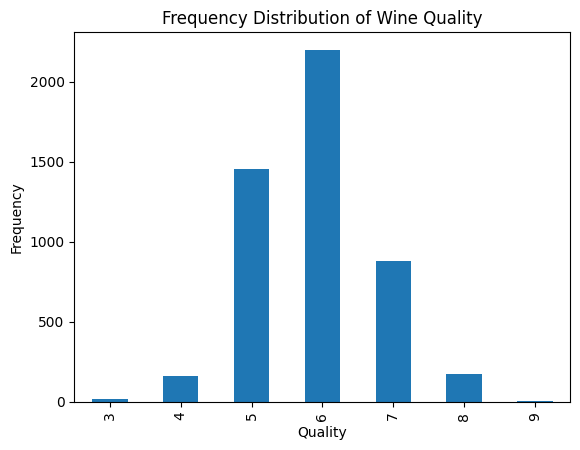

In [11]:
import matplotlib.pyplot as plt

df['quality'].value_counts().sort_index().plot(kind='bar')
plt.title('Frequency Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()


4. Reduce the levels of rating for quality to three levels as high, medium and low. Assign the
levels of 3 and 4 to level 0; 5 and 6 to level 1; and 7,8 and 9 to level 2. (10 points)

In [12]:
df['quality_label'] = pd.cut(df['quality'], bins=[2, 4, 6, 9], labels=['low', 'medium', 'high'])
df['quality_label'].value_counts()


quality_label
medium    3655
high      1060
low        183
Name: count, dtype: int64

5. Splitting the Data-Set into Independent and Dependent Features. (10 points)

In [14]:
independent_df = df.drop(['quality', 'quality_label'], axis=1)
dependent_df = df['quality_label']

In [15]:
independent_df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5


In [16]:
dependent_df.head(2)

0    medium
1    medium
Name: quality_label, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

6. Normalize the data set. (12 points)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [23]:
scaler.fit_transform(independent_df)

array([[0.30769231, 0.18627451, 0.21686747, ..., 0.25454545, 0.26744186,
        0.12903226],
       [0.24038462, 0.21568627, 0.20481928, ..., 0.52727273, 0.31395349,
        0.24193548],
       [0.41346154, 0.19607843, 0.24096386, ..., 0.49090909, 0.25581395,
        0.33870968],
       ...,
       [0.25961538, 0.15686275, 0.11445783, ..., 0.24545455, 0.27906977,
        0.22580645],
       [0.16346154, 0.20588235, 0.18072289, ..., 0.56363636, 0.18604651,
        0.77419355],
       [0.21153846, 0.12745098, 0.22891566, ..., 0.49090909, 0.11627907,
        0.61290323]])

In [24]:
scaler_dfx = pd.DataFrame(scaler.fit_transform(independent_df),columns = independent_df.columns)
scaler_dfx.shape[0]

4898

7. Divide the dataset to training and test sets. (12 points)

In [26]:
from sklearn.model_selection import train_test_split
input_train,input_test,output_train,output_test = train_test_split(scaler_dfx,dependent_df,test_size = 0.2, random_state = 1)
input_train.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3749,0.240385,0.196078,0.174699,0.095092,0.124629,0.132404,0.310905,0.127820,0.645455,0.430233,0.483871
1344,0.336538,0.147059,0.222892,0.019939,0.094955,0.170732,0.361949,0.071139,0.490909,0.209302,0.677419
58,0.269231,0.294118,0.090361,0.061350,0.103858,0.080139,0.160093,0.115481,0.354545,0.186047,0.354839


In [27]:
input_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2414,0.230769,0.294118,0.108434,0.104294,0.255193,0.090592,0.431555,0.204743,0.736364,0.569767,0.193548
1584,0.250000,0.166667,0.445783,0.110429,0.106825,0.174216,0.464037,0.163678,0.445455,0.232558,0.193548
3248,0.250000,0.166667,0.222892,0.059816,0.089021,0.135889,0.320186,0.096202,0.418182,0.209302,0.500000
645,0.240385,0.176471,0.150602,0.110429,0.145401,0.146341,0.364269,0.173318,0.472727,0.220930,0.161290
3163,0.317308,0.274510,0.222892,0.064417,0.029674,0.128920,0.243619,0.062657,0.327273,0.313953,0.758065
...,...,...,...,...,...,...,...,...,...,...,...
1854,0.288462,0.156863,0.210843,0.088957,0.115727,0.146341,0.378190,0.140544,0.518182,0.383721,0.403226
4326,0.346154,0.294118,0.204819,0.118098,0.127596,0.146341,0.368910,0.176595,0.354545,0.348837,0.193548
2661,0.326923,0.215686,0.156627,0.013804,0.094955,0.153310,0.392111,0.085406,0.427273,0.395349,0.532258
769,0.278846,0.029412,0.204819,0.125767,0.100890,0.135889,0.241299,0.175246,0.636364,0.209302,0.209677


In [28]:
output_test

2414       low
1584    medium
3248      high
645     medium
3163      high
         ...  
1854      high
4326    medium
2661    medium
769       high
2857      high
Name: quality_label, Length: 980, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [29]:
output_train

3749    medium
1344      high
58      medium
3177    medium
3942    medium
         ...  
2895    medium
2763    medium
905        low
3980    medium
235     medium
Name: quality_label, Length: 3918, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

8. Check whether target variable is balanced or not if not balanced the target variable (12
points)

In [30]:
output_train.value_counts(normalize=True)


quality_label
medium    0.747065
high      0.214140
low       0.038795
Name: proportion, dtype: float64

9. Use the Random Forest algorithm to predict the quality of wine using its attributes. (12
points)

In [33]:
from sklearn.ensemble import RandomForestClassifier
randomForestClassifier=RandomForestClassifier()


In [34]:
RandomForestClassifier = randomForestClassifier.fit(input_train,output_train)
RandomForestClassifier

RandomForestClassifier()

In [35]:
pred_test_RM = RandomForestClassifier.predict(input_test)
pred_test_RM

array(['medium', 'medium', 'high', 'medium', 'high', 'medium', 'medium',
       'medium', 'medium', 'medium', 'high', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'high', 'high', 'medium', 'medium', 'medium',
       'medium', 'medium', 'high', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium', 'high',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'high', 'medium', 'medium', 'medium', 'medium',
       'high', 'medium', 'medium', 'medium', 'medium', 'high', 'medium',
       'medium', 'high', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'high', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'high', 'medium', 'medium', 'medium', 'high',
       'medium', 'medium', 'medium', 'medium', 'medium', 

10. Display the confusion matrix to evaluate the model performance. (15 points)

In [36]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



array([[139,   0,  82],
       [  0,   2,  29],
       [ 35,   3, 690]])

In [41]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(output_test,pred_test_RM)
conf_mat

array([[139,   0,  82],
       [  0,   2,  29],
       [ 35,   3, 690]])

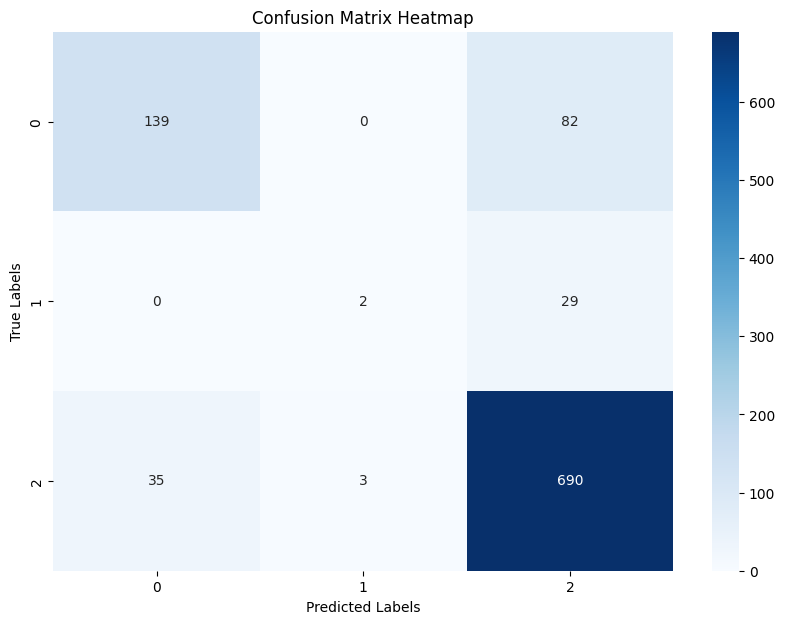

In [50]:
plt.figure(figsize=(10, 7))
sn.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()